In [32]:
# Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Les librairies sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Autres librairies
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation de base des données
df=pd.read_csv("/Users/macbook/Desktop/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Donc il n'y a pas de valeurs manquantes.

## Descriptions des données

* Variable cible ： 

J'ai prix la variable **charge** comme la variable cible.

### Distribution de la variable cible

Text(0.5, 1.0, 'Distribution of Charges')

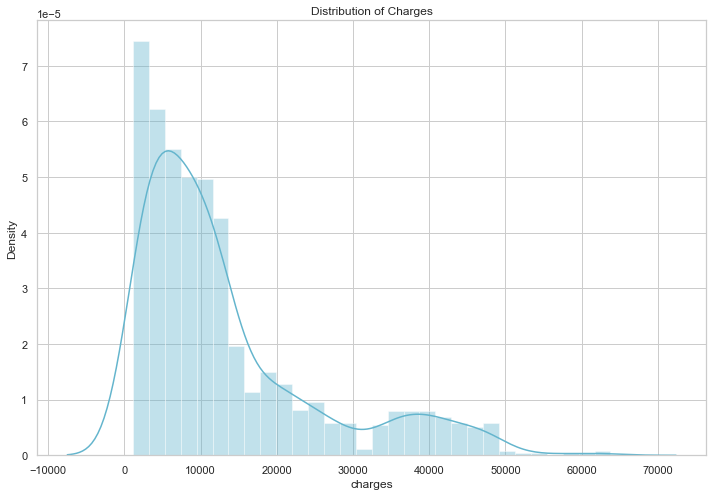

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

Cette distribution est penchée à droit. Pour la rendre plus proche de la loi normale, nous pouvons appliquer le logarithme naturel.

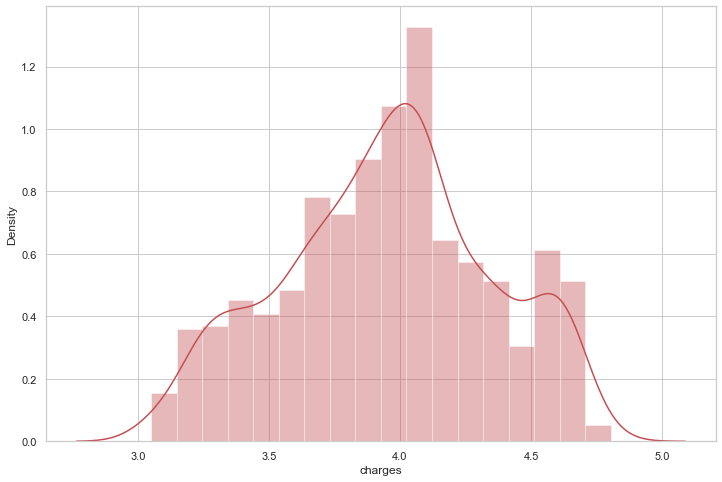

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

### Distributions générales d'autres variables

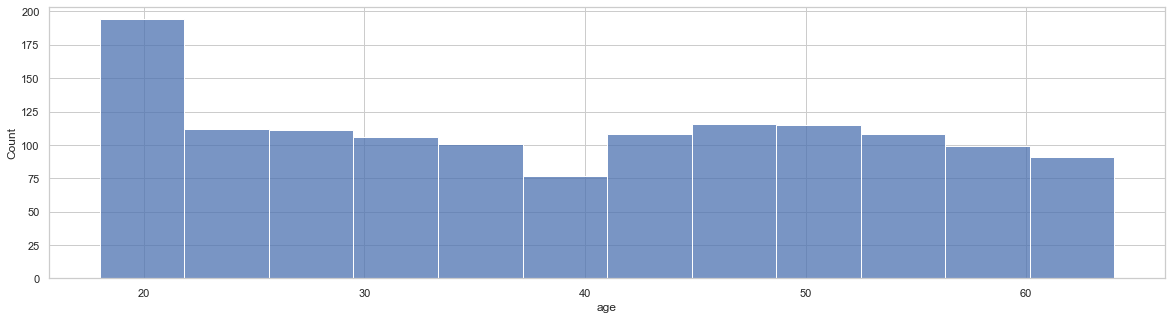

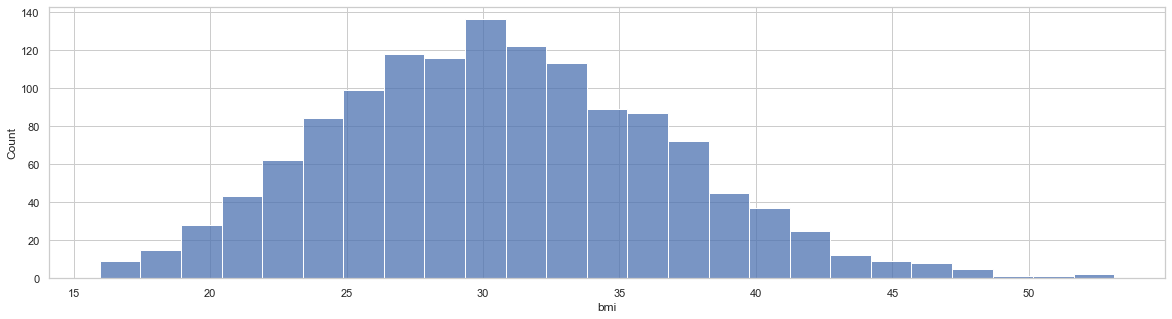

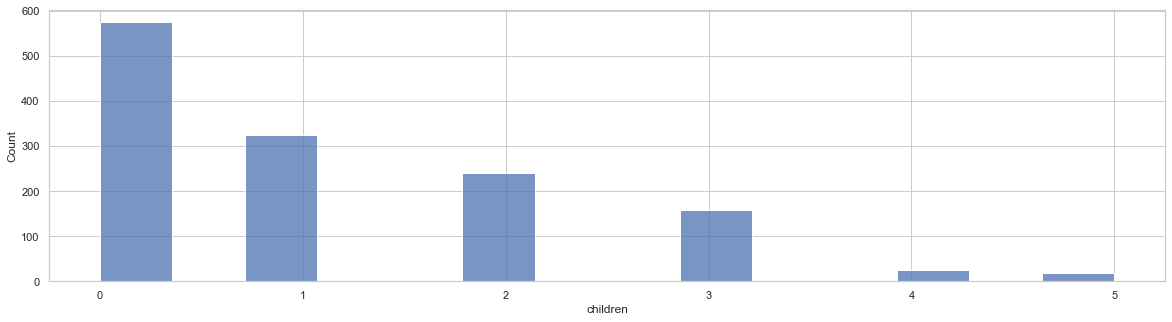

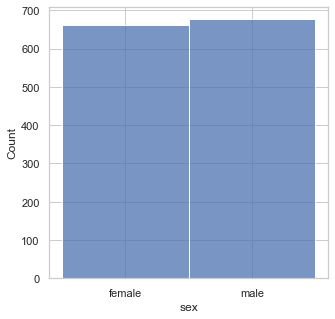

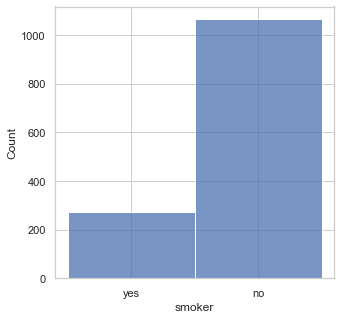

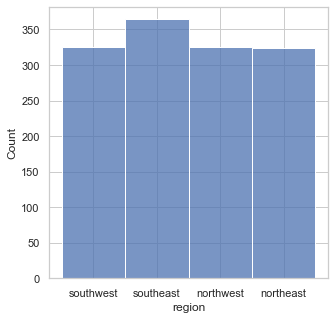

In [9]:
var_list = ['age','bmi','children','sex','smoker','region']
for column in var_list:
    if column in ['sex','smoker','region']:
        plt.figure(figsize =(5,5))
    else:
        plt.figure(figsize=(20,5))
    sns.histplot(x = column, data=df)
    plt.show()

Selon ces tableaux, on peut observer les répartitions de chaque variable.

1. Les personnes qui ont pris l'assurance se trouvent dans l'intervalle de 1 an à 64 ans. Les personnes âgées de 20 ans sont plus nombreuses que les autres d'âge, les quadragénaires sont encore moins nombreux à prendre une assurance par rapport aux autres âges.
2. La répartition de l'histagramme de BMI ressemble une distribution de la loi normale, la majorité des personnes se situant dans la fourchette 25-35.
3. De plupart des gens n'ont pas d'enfant, on voit que le nombreux des parants diminue en fonction de l'augmentation de nombreux des enfants.
4. En terme de la sexe, on observe que l'écart est très petit pour payer les charges d'assurance.
5. Parmi les patiens, il y a moins de fumeurs par rapport aux non-fumeurs.
6. Toutes les régions semblent avoir le même nombre/représentation, sauf le sud-est qui est légèrement plus élevé.

### Graphiques entre la variable cible et les autres variables

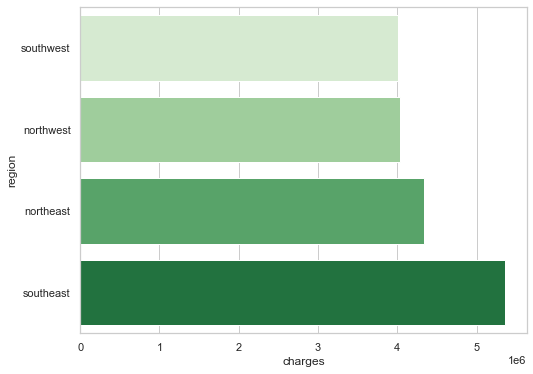

In [10]:
# Charges par région
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Greens')

Ainsi, dans l'ensemble, les frais médicaux les plus élevés se situent dans le Sud-Est et les plus bas dans le Sud-Ouest.

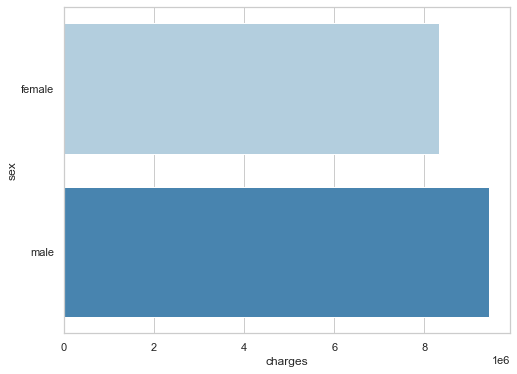

In [11]:
# Charges par sexe
charges = df['charges'].groupby(df.sex).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

En termes de répartition par sexe, les patients masculins dépensent un peu plus en charges médicaux que les patientes.

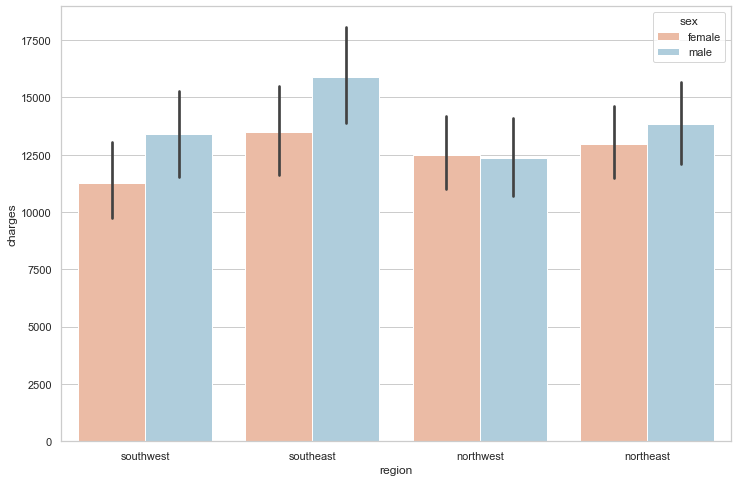

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='RdBu')

Avec ce graphique,sauf qu'au nord du l'ouest, les autres régions ont tout un assez grand écart entre les deux sexes.

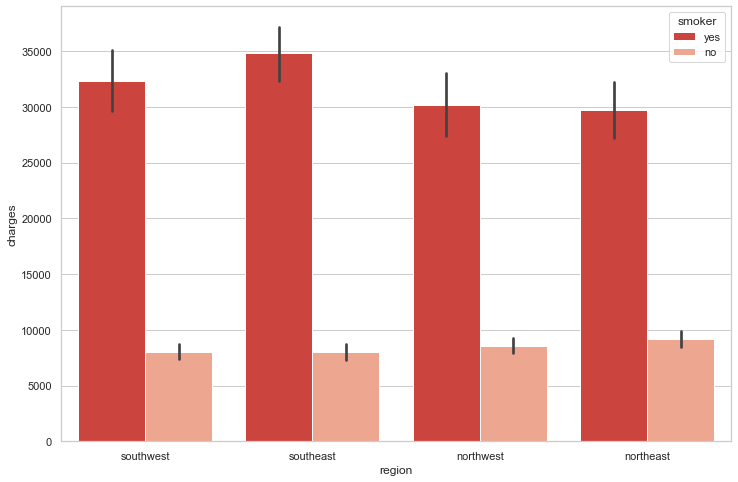

In [13]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

Les fumeurs s'occupent toujours le plupart nombre de places à chaque région en terme des charges.

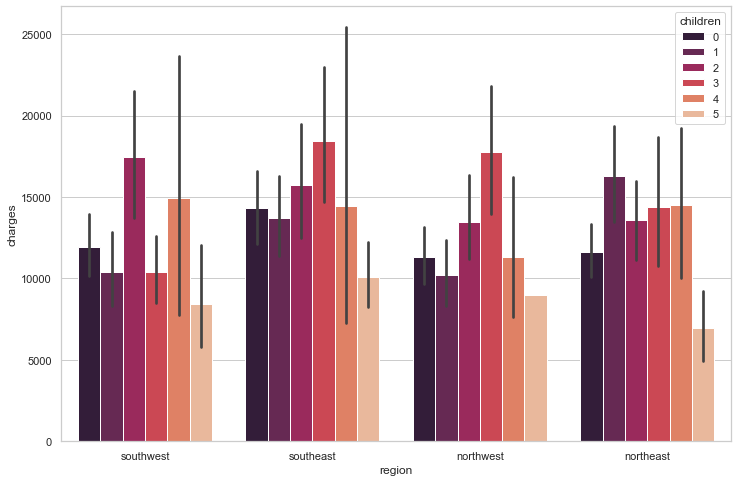

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='rocket')

Selon ce graphique, on peut voir sur ces diagrammes à barres, dans toutes les régions, la majorité des gens ont deux ou trois enfants, et pour ceux du Nord-Ouest et du Sud-Est, les dépenses médicales moyennes sont les plus élevées pour les familles qui élèvent trois enfants.

Ensuite, on analyse maintenant les frais médicaux par âge et par nombre d'enfant en fonction du facteur "smoker".

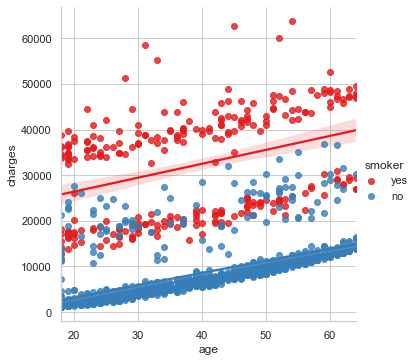

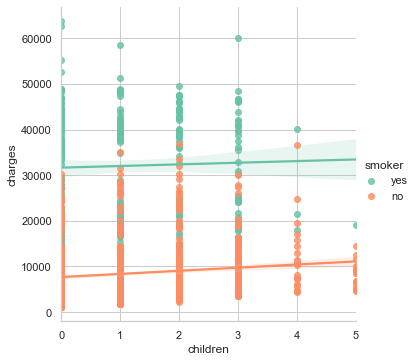

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set2')

Le tabac a l'impact le plus élevé sur les charges médicaux, même si les coûts augmentent avec l'âge et le nombre d'enfant. En outre, les personnes qui ont des enfants fument généralement moins.

In [18]:
#Conversion des étiquettes d'objets en catégories
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

## Model building

In [19]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Linear regression

In [22]:
LR = LinearRegression()
LR.fit(x_train, y_train)
LR.score(x_test, y_test)

0.7998747145449959

On a finalement 80% de l'accuracy, donc ce résulat est assez bien.

### Decision tree

In [28]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
DT.score(x_test, y_test)

0.6637384400295261

Cet accuracy n'est pas performent, car il a seulement 66.3%.

### Random forest

In [31]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))

0.8752540626754878


Avec le modèle random forest, on voit bien que l'accuracy s'améliore beaucoup.

### Gradient Boosting

In [33]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_test,y_test)

0.8981541429386667

Parmi ces quatre modèles, on a obtenu la plus grande précision avec Gradient Boosting.